<!-- ![Video2X Logo](https://user-images.githubusercontent.com/21986859/102733190-872a7880-4334-11eb-8e9e-0ca747f130b1.png) -->

# [Video2X](https://github.com/k4yt3x/video2x) Colab Notebook

If you have any questions, suggestions, etc., post an issue [here](https://github.com/k4yt3x/video2x/issues/new).

Licensed under the ISC License: https://www.isc.org/licenses/. \
Copyright 2022 K4YT3X and contributors.

Last tested on April 3, 2022 for version 5.0.0-beta5.

In [ ]:
#@title ## Step 0: Runtime Selection

#@markdown This step is manual. You'll need to select a GPU runtime for Video2X to work. On the menu bar at the top, select:

#@markdown > Runtime > Change runtime type > Hardware accelerator

#@markdown Change "Hardware accelerator" to GPU and click "Save." After you're done, execute this cell to see the detailed information about the GPU allocated to you (optional).

!nvidia-smi

In [ ]:
#@title ## Step 1: Install Build Dependencies

#@markdown This step installs the tools and libraries required to build and run Video2X.

!apt-get update
!apt-get install -y --no-install-recommends \
    python3.8 python3-pip python3-opencv python3-pil python3-tqdm \
    python3.8-dev libvulkan-dev glslang-dev glslang-tools \
    build-essential swig ffmpeg ninja-build

In [ ]:
#@title ## Step 2: Install Video2X and Python Dependencies

#@markdown This step Video2X and its dependencies. Since some dependencies must be compiled from source code, it will take quite a while to complete. Sit back and have a coffee. This step might be drastically sped up in the future by including binary wheels for some of the dependencies in PyPI.

# use pre-built binary wheels to drastically reduce build time
# RIFE ncnn Vulkan may still have to be compiled due to its unique setup.py
!curl -L \
    -O https://github.com/media2x/waifu2x-ncnn-vulkan-python/releases/download/1.0.2rc3/waifu2x-ncnn-vulkan-python-1.0.2rc3-ubuntu1804_3.8.zip \
    -O https://github.com/media2x/srmd-ncnn-vulkan-python/releases/download/1.0.2-2/srmd-ncnn-vulkan-python-1.0.2-2-ubuntu1804_3.8.zip \
    -O https://github.com/media2x/realsr-ncnn-vulkan-python/releases/download/1.0.5/realsr-ncnn-vulkan-python-1.0.5-ubuntu1804_3.8.zip \
    -O https://github.com/media2x/rife-ncnn-vulkan-python/releases/download/1.1.2-2/rife-ncnn-vulkan-python-1.1.2-2-ubuntu1804_3.8.zip \
    -O https://github.com/media2x/realcugan-ncnn-vulkan-python/releases/download/1.0.1/realcugan-ncnn-vulkan-python-1.0.1-ubuntu1804_3.8.zip
!unzip -d /content/wheels \*.zip
!find /content/wheels/ -iname '*.whl' -exec mv -t /content/wheels {} +

# temporary: install video2x directly from GitHub
#   since version 5.0.0 doesn't have a release on PyPI yet
!python3.8 -m pip install -U pip wheel pdm-pep517 setuptools setuptools-scm
!python3.8 -m pip install -vf /content/wheels video2x@git+https://github.com/k4yt3x/video2x.git@5.0.0-beta5

# upgrade Colab'd default Pillow (too old)
!python3.8 -m pip install -U Pillow

In [ ]:
#@title ## Step 3: Mount Google Drive

#@markdown In order to read/write video data from/to your Google Drive, you will need to grant Google Colab access to your Google Drive. Upon running the following script, you'll be prompted to permit this script access to your Google Drive.

# mount your Google Drive into the runtime
from google.colab import drive
drive.mount('/mnt/gdrive')

# change the working directory to the root directory of your Google Drive
%cd /mnt/gdrive/MyDrive/

In [ ]:
#@title ## Step 4.1 Upscale

#@markdown Fill in the form and run this cell to upscale a video. **Remember to use the free resource fairly and not to run a free session for over 12 hours.** You can get [Colab Pro/Pro+](https://colab.research.google.com/signup/pricing) for longer runtimes.

# HACK: run Python 3.8 libraries with Python 3.7
import sys
sys.path.append("/usr/local/lib/python3.8/dist-packages/")

import pathlib
from video2x import Video2X

video2x = Video2X()

# The input and output files' file names. Video2X will operate in the root directory of your Google Drive.
input_filename = "input.mp4" #@param {type:"string"}
output_filename = "output.mp4" #@param {type:"string"}

# Width and height of the output video. You can fill in one of them and the other one will be calculated automatically if it is left as `0`.
width = 0 #@param {type:"number"}
height = 720 #@param {type:"number"}

# The de-noise level. Different models support different values. If setting the value result in an error, try lowering the value.
noise = 3 #@param {type:"slider", min:0, max:3, step:1}

# Number of parallel processes to launch. There usually isn't a point setting this higher than 3 as the performance wouldn't improve.
processes = 1 #@param {type:"slider", min:1, max:10, step:1}

# Adjacent frames with < n% diff won't be processed.
threshold = 0 #@param {type:"slider", min:0, max:100, step:1}

# The algorithm to use. Refer to the [Wiki page](https://github.com/k4yt3x/video2x/wiki/Algorithms) for more information.
algorithm = "waifu2x" #@param ["waifu2x", "srmd", "realsr", "realcugan"]

# convert width and height inputs
width = width if width != 0 else None
height = height if height != 0 else None

# check if input file exists
gdrive = pathlib.Path("/mnt/gdrive/MyDrive/")
if not (gdrive / input_filename).is_file():
    raise FileNotFoundError(f"file {(gdrive / input_filename)} does not exist")

video2x.upscale(
    gdrive / input_filename,
    gdrive / output_filename,
    width,
    height,
    noise,
    processes,
    threshold,
    algorithm,
)

In [ ]:
#@title ## Step 4.2 Interpolate

#@markdown Fill in the form and run this cell to interpolate a video (currently only 2x is supported). **Remember to use the free resource fairly and not to run a free session for over 12 hours.** You can get [Colab Pro/Pro+](https://colab.research.google.com/signup/pricing) for longer runtimes.

# HACK: run Python 3.8 libraries with Python 3.7
import sys
sys.path.append("/usr/local/lib/python3.8/dist-packages/")

import pathlib
from video2x import Video2X

video2x = Video2X()

# The input and output files' file names. Video2X will operate in the root directory of your Google Drive.
input_filename = "input.mp4" #@param {type:"string"}
output_filename = "output.mp4" #@param {type:"string"}

# Number of parallel processes to launch. There usually isn't a point setting this higher than 3 as the performance wouldn't improve.
processes = 3 #@param {type:"slider", min:1, max:10, step:1}

# Adjacent frames with > n% diff won't be processed.
threshold = 10 #@param {type:"slider", min:0, max:100, step:1}

# The algorithm to use. Refer to the [Wiki page](https://github.com/k4yt3x/video2x/wiki/Algorithms) for more information.
algorithm = "rife" #@param ["rife"]

# check if input file exists
gdrive = pathlib.Path("/mnt/gdrive/MyDrive/")
if not (gdrive / input_filename).is_file():
    raise FileNotFoundError(f"file {(gdrive / input_filename)} does not exist")

video2x.interpolate(
    gdrive / input_filename,
    gdrive / output_filename,
    processes,
    threshold,
    algorithm,
)

## Appendix A: File Naming

If your input file's name is `input.mp4`, you should set `input_filename` to `input.mp4` and put your file at the root of your Google Drive like this:

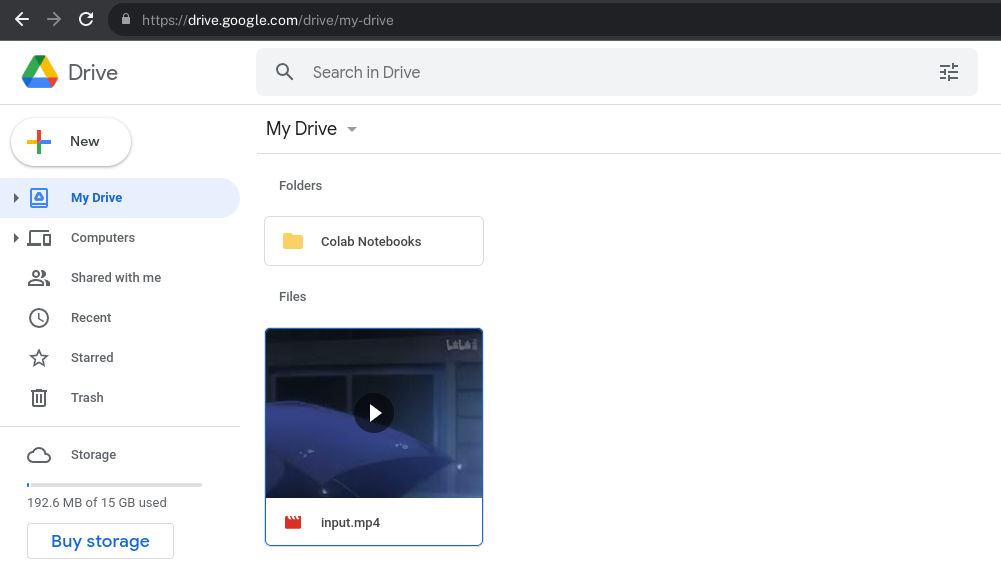